# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

There are 10 different csv files of the data. Each one contains information on 6 different states. There are 11 different columns (including an unnamed index column). This is what the header is in each file

<code>,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop</code>

An example of one row looks like:

<code>0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36 ",2341093M_2489527F</code>

The rows seem to be sorted based on the State column.

Some key things to note already is:
1. The columns that show the percentage of ethnicities have a % sign at the end
2. The Income column has a $ sign at the start and a space at the end
3. The GenderPop column is not in string format as there are no quotation marks used
4. The GenderPop column has information on the number of both Males and Females separated by an '_', "M", and "F to shoe which number represents what.
5. The first column is unnamed and works as an index column

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

df_list = []
for name in glob.glob("*.csv"):
    df = pd.read_csv(name)
    df_list.append(df)
us_census = pd.concat(df_list)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [227]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


For the first histogram (avg income vs proportion of women), having Income and GenderPop be in object types is not very useful

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [228]:
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


It makes sense for object types for those columns. The income is not just a float, it has a $ sign (and the comma may also be messing it up)
The GenderPop column is even more messes up, it has both men and women numbers with characters to differentiate between them. Not useful for the coding

The Income column is easy to deal with, remove the $ sign (and maybe the comma depending on how Python handles it) and convert to a float
The GenderPop column is more complex. We can safely remove the "M" and "F" characters (assuming the order is consistent and we remember the order)
From there the string should be split into two parts, the first part will be converted to a int and moved into a "Male" column while the second part will be converted to a int and moved to a "Female" column

We also don't need this Unnamed: 0 column as it just repeats the index (which we also need to reset), let's just do that now since it doesn't come up later

In [229]:
us_census.drop(columns=['Unnamed: 0'], inplace=True)
us_census.reset_index(drop=True, inplace=True)
us_census.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [230]:
us_census["Income"] = us_census["Income"].str.replace(r'\$|,', "", regex=True)
us_census["Income"] = pd.to_numeric(us_census["Income"])

In [231]:
print(us_census.head())
print(us_census.dtypes)

        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     Income            GenderPop  
0  43296.36    2341093M_2489527F  
1  70354.74      384160M_349215F  
2  54207.82    3299088M_3342840F  
3  41935.63    1451913M_1506295F  
4  67264.78  19087135M_19334329F  
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [232]:
gender_split = us_census["GenderPop"].str.split(pat="_", expand=True)
us_census["Men"] = gender_split[0]
us_census["Women"] = gender_split[1]
print(us_census.head()) 

        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     Income            GenderPop        Men      Women  
0  43296.36    2341093M_2489527F   2341093M   2489527F  
1  70354.74      384160M_349215F    384160M    349215F  
2  54207.82    3299088M_3342840F   3299088M   3342840F  
3  41935.63    1451913M_1506295F   1451913M   1506295F  
4  67264.78  19087135M_19334329F  19087135M  19334329F  


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [233]:
us_census["Men"] = us_census["Men"].str.replace(r'M', "", regex=True)
us_census["Women"] = us_census["Women"].str.replace(r'F', "", regex=True)

us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])

In [234]:
print(us_census.head())
print(us_census.dtypes)

        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     Income            GenderPop       Men       Women  
0  43296.36    2341093M_2489527F   2341093   2489527.0  
1  70354.74      384160M_349215F    384160    349215.0  
2  54207.82    3299088M_3342840F   3299088   3342840.0  
3  41935.63    1451913M_1506295F   1451913   1506295.0  
4  67264.78  19087135M_19334329F  19087135  19334329.0  
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop   

The Women column changed to a float, not an int type, strange. (This will come up later but likely because the Women column has NA values while I don't believe the Men column does)

8. Now you should have the columns you need to make the graph.

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

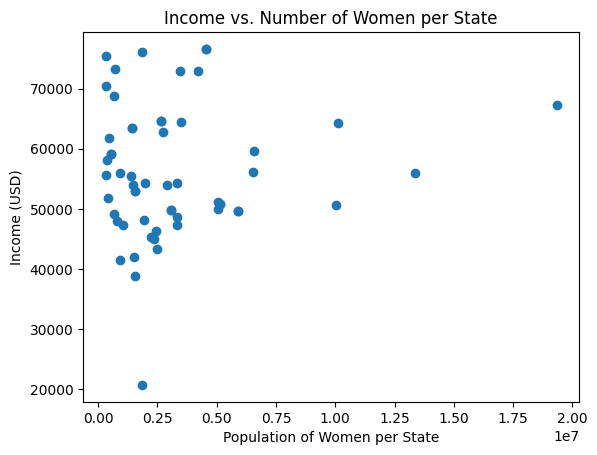

In [235]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.title("Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (USD)")
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [236]:
us_census["Women"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [237]:
us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"], inplace=True)
us_census["Women"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [238]:
us_census.duplicated().sum()

9

There are 9 rows that are duplicates

11. Drop those duplicates using the `.drop_duplicates()` function.

In [239]:
us_census = us_census.drop_duplicates().reset_index(drop=True)
us_census.duplicated().sum()

0

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

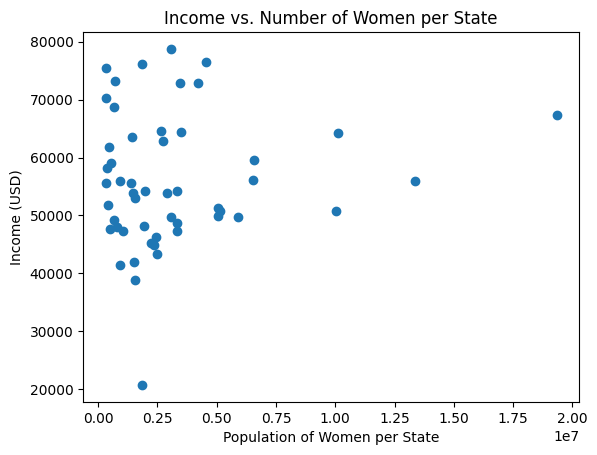

In [240]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.title("Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (USD)")
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [241]:
print(us_census.columns)
print(us_census.head())

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     Income            GenderPop       Men       Women  
0  43296.36    2341093M_2489527F   2341093   2489527.0  
1  70354.74      384160M_349215F    384160    349215.0  
2  54207.82    3299088M_3342840F   3299088   3342840.0  
3  41935.63    1451913M_1506295F   1451913   1506295.0  
4  67264.78  19087135M_19334329F  19087135  19334329.0  


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [242]:
us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]] = us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].replace("%", "", regex=True)
us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]] = us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].apply(pd.to_numeric)
print(us_census.head())
print(us_census.dtypes)

        State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05     0.03   
1      Alaska    733375      5.91  60.91   2.85   16.39   5.45     1.06   
2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88     0.17   
3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14     0.15   
4  California  38421464     37.29  40.22   5.68    0.41  13.05     0.35   

     Income            GenderPop       Men       Women  
0  43296.36    2341093M_2489527F   2341093   2489527.0  
1  70354.74      384160M_349215F    384160    349215.0  
2  54207.82    3299088M_3342840F   3299088   3342840.0  
3  41935.63    1451913M_1506295F   1451913   1506295.0  
4  67264.78  19087135M_19334329F  19087135  19334329.0  
State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     obje

In [243]:
us_census[["State", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]

,State,Hispanic,White,Black,Native,Asian,Pacific
0,Alabama,3.75,61.88,31.25,0.45,1.05,0.03
1,Alaska,5.91,60.91,2.85,16.39,5.45,1.06
2,Arizona,29.57,57.12,3.85,4.36,2.88,0.17
3,Arkansas,6.22,71.14,18.97,0.52,1.14,0.15
4,California,37.29,40.22,5.68,0.41,13.05,0.35
5,Colorado,20.78,69.90,3.55,0.57,2.66,NaN
6,Connecticut,15.60,67.68,10.35,0.13,4.02,0.02
7,Delaware,8.82,64.63,20.74,0.26,3.27,NaN
8,District of Columbia,9.17,33.10,51.78,0.20,3.38,0.03
9,Florida,21.34,59.08,15.17,0.21,2.28,0.05


First instinct says to make the NA values equal to 100 - (the sum of the other races), especially because 0 is a valid number (see Pacific for Puerto Rico). However, if we test this in Colorado then we get 100 - (20.78 + 69.90 + 3.55 + 0.57 + 2.66) = 2.54. This number seems way too high considering most other states are under 0.05.

Also, rows without any NA values don't even add up fully to 100 so that idea doesn't work. The only thing that makes sense in this case is to set any NA values equal to 0.

In [248]:
us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]] = us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]].fillna(0.0)
us_census[["State", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]

,State,Hispanic,White,Black,Native,Asian,Pacific
0,Alabama,3.75,61.88,31.25,0.45,1.05,0.03
1,Alaska,5.91,60.91,2.85,16.39,5.45,1.06
2,Arizona,29.57,57.12,3.85,4.36,2.88,0.17
3,Arkansas,6.22,71.14,18.97,0.52,1.14,0.15
4,California,37.29,40.22,5.68,0.41,13.05,0.35
5,Colorado,20.78,69.90,3.55,0.57,2.66,0.00
6,Connecticut,15.60,67.68,10.35,0.13,4.02,0.02
7,Delaware,8.82,64.63,20.74,0.26,3.27,0.00
8,District of Columbia,9.17,33.10,51.78,0.20,3.38,0.03
9,Florida,21.34,59.08,15.17,0.21,2.28,0.05


In [250]:
us_census.duplicated().sum()

0

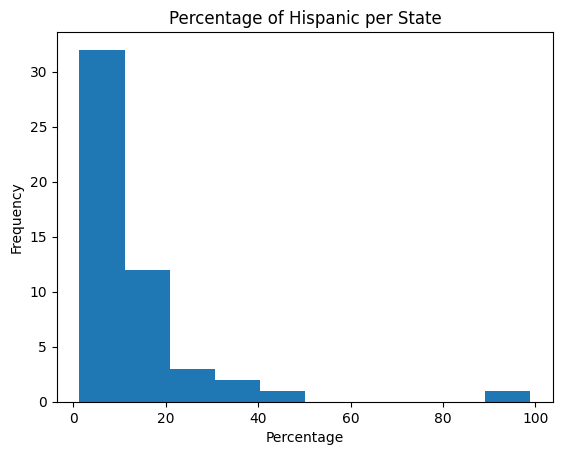

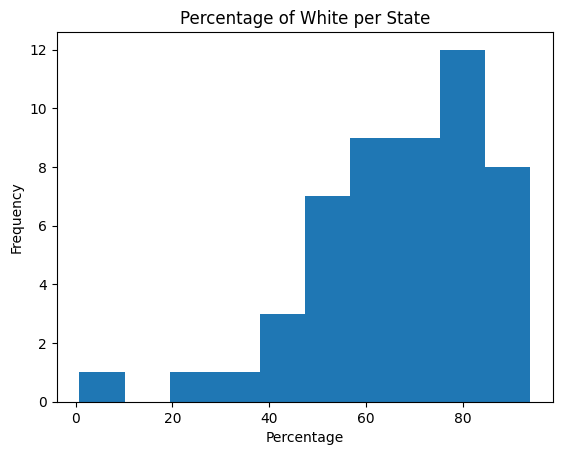

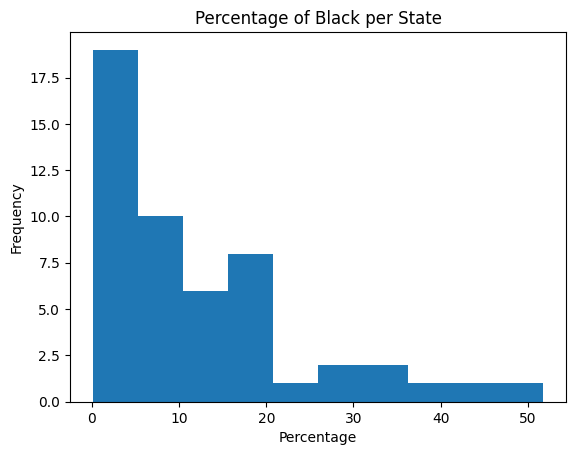

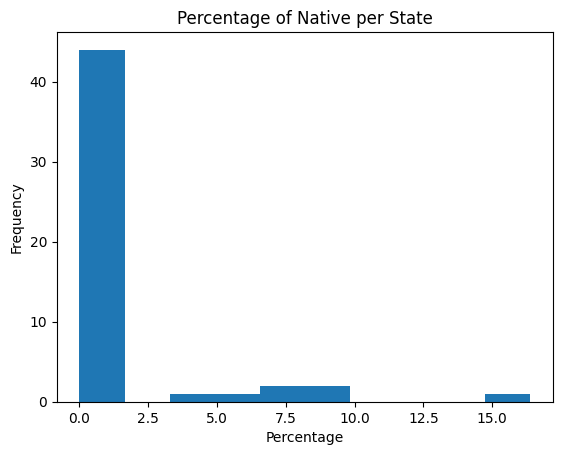

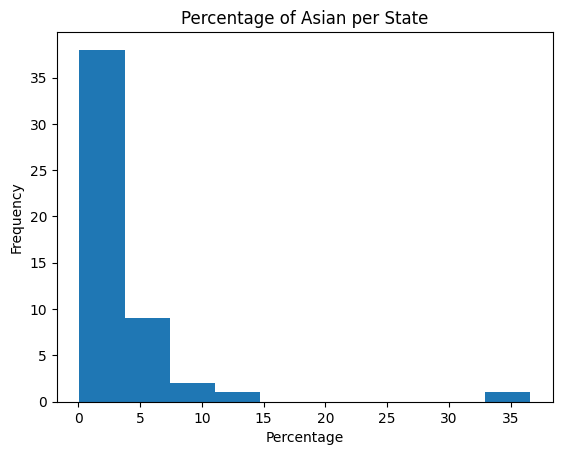

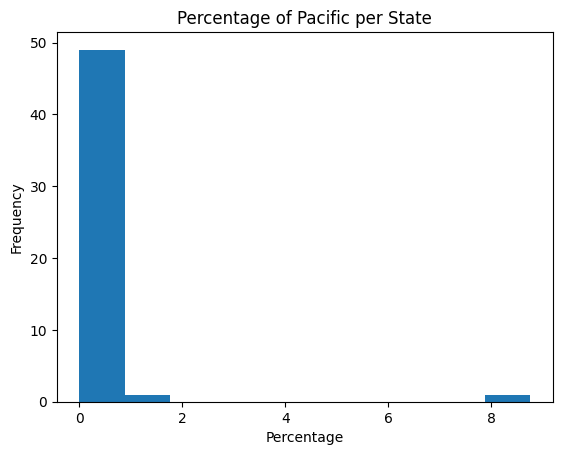

In [253]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title(f"Percentage of {race} per State")
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()